### MSc Computer Science, Data Science @UniPD
### Optimization Methods for Data Science
---

# Packages

In [1]:
env = 'colab'  # 'pc'
using_gpu = True

In [2]:
%%capture
git_download_path = 'https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Labelling/master/'

def download_files(url_dict):
    for file, url in url_dict.items():
        !wget -O {file} {url} {file}

if env == 'colab':
    from google.colab import drive
    drive.mount('/content/drive')

    files = [
           'BCGDSolver.py',
           'DataProperties.py',
           'GradientDescentSolver.py',
           'GradientSolver.py',
           'Utils.py'  
    ]

    url_dict = {file: git_download_path + file for file in files}
    download_files(url_dict)

Mounted at /content/drive
--2022-04-24 08:43:48--  https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Labelling/master/BCGDSolver.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3337 (3.3K) [text/plain]
Saving to: ‘BCGDSolver.py’

BCGDSolver.py       100%[===================>]   3.26K  --.-KB/s    in 0s      

2022-04-24 08:43:48 (31.5 MB/s) - ‘BCGDSolver.py’ saved [3337/3337]

--2022-04-24 08:43:48--  http://bcgdsolver.py/
Resolving bcgdsolver.py (bcgdsolver.py)... failed: Name or service not known.
wget: unable to resolve host address ‘bcgdsolver.py’
FINISHED --2022-04-24 08:43:48--
Total wall clock time: 0.6s
Downloaded: 1 files, 3.3K in 0s (31.5 MB/s)
--2022-04-24 08:43:48--  https://raw.githubusercontent.com/PashaIanko/Semi-Supervised-Label

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

from sklearn import datasets
from sklearn.metrics import accuracy_score
import pandas as pd
import timeit

# Plotting
import matplotlib.pyplot as plt




In [4]:
import Utils
import GradientSolver
import GradientDescentSolver
import DataProperties
import BCGDSolver
import importlib

def reload_all(modules_list):
    for module in modules_list:
        importlib.reload(module)

reload_all(
    [
        Utils,
        GradientSolver,
        GradientDescentSolver,
        DataProperties,
        BCGDSolver
    ]
)

from Utils import *
from GradientSolver import GradientSolver
from GradientDescentSolver import GradientDescentSolver
from DataProperties import DataProperties
from BCGDSolver import BCGDSolver

# Data preparation

In [9]:
# Fix states
sklearn_random_state = 42
numpy_seed = 42

np.random.seed(numpy_seed)

Data shape: X: (50, 2), Y: (50,)


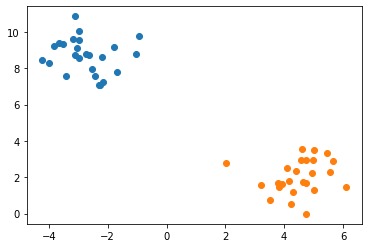

In [10]:
X, Y = make_blobs(
    n_samples = DataProperties.n_samples,
    centers = DataProperties.n_clusters,
    n_features = DataProperties.n_dims,
    random_state = sklearn_random_state
)
Y = Y.astype('float64')
clusters = np.unique(Y)

print(f'Data shape: X: {X.shape}, Y: {Y.shape}')
plot_clusters(X, Y)

## Unlabel subset and visualize

Found 25 instances of object 0.0
We have to delabel 23 instances
Found 25 instances of object 1.0
We have to delabel 23 instances

    We have 46 unlabeled data
    Out of 50
    


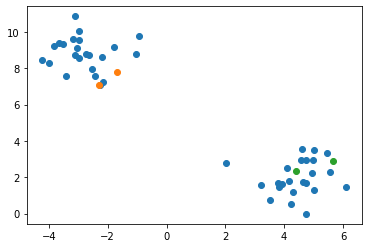

In [11]:
Y_delabeled = delabel_data(
    Y,
    labeled_percent = DataProperties.labeled_percentage,
    delabel_value = DataProperties.unlabeled
)

print(
    f'''
    We have {len(Y_delabeled[Y_delabeled == DataProperties.unlabeled])} unlabeled data
    Out of {len(Y_delabeled)}
    '''
)

plot_clusters(X, Y_delabeled)

- Up to now, we have the clustered data, saved correct labelling (Y) and delabelled data (Y_delabelled)
- For the unlabelled y variables, the loss function depends on the (y_1, ..., y_U) unlabeled parameters. Each of the
parameters is independent on others, and can be 0 or 1 (for **binary clustering problem**). This is why we will be searching
for **optimal solution in the R^(U)** space, which yields minimum to the **loss function**

In [12]:
import collections
class_stats = collections.Counter(Y_delabeled)
assert(len(class_stats.keys()) == 3)  # 2 labeled classes and 1 unlabeled

# Gradient descent

In [ ]:
solver = GradientDescentSolver(
    similarity_func = None, # euclidian_similarity,
    lr_strategy = 'lr_constant',  # search for alpha_k
    learning_rate = 0.001
)

In [ ]:
Y_preds_GD = solver.solve(
    X,
    Y_delabeled,
    iter_limit = 60,
    delta_loss_limit = 0.001
)

Loss: 25.133279635517184, delta loss: 25.133279635517184
Loss: 24.692046825881985, delta loss: 0.4412328096351992
Loss: 24.298667083853772, delta loss: 0.3933797420282126
Loss: 23.94673438446902, delta loss: 0.3519326993847507
Loss: 23.63077100177023, delta loss: 0.31596338269879
Loss: 23.346088146351793, delta loss: 0.2846828554184384
Loss: 23.08866792244849, delta loss: 0.25742022390330277
Loss: 22.855063307403576, delta loss: 0.23360461504491425
Loss: 22.642313369598728, delta loss: 0.21274993780484763
Loss: 22.447871373983205, delta loss: 0.19444199561552367
Loss: 22.269543789721443, delta loss: 0.17832758426176198
Loss: 22.105438522836014, delta loss: 0.1641052668854286
Loss: 21.953920956937267, delta loss: 0.15151756589874665
Loss: 21.8135766047739, delta loss: 0.1403443521633676
Loss: 21.683179358736666, delta loss: 0.13039724603723357
Loss: 21.561664484968123, delta loss: 0.1215148737685432
Loss: 21.448105637880257, delta loss: 0.1135588470878659
Loss: 21.34169528348301, delta 

Accuracy: 1.0


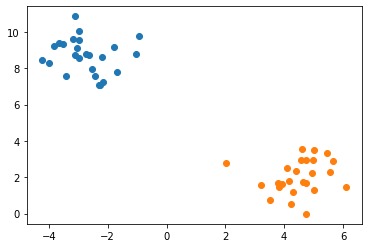

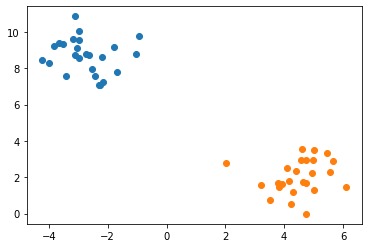

In [ ]:
plot_clusters(X, Y)
plot_clusters(X, Y_preds_GD)
print(f'Accuracy: {accuracy_score(Y, Y_preds_GD)}')

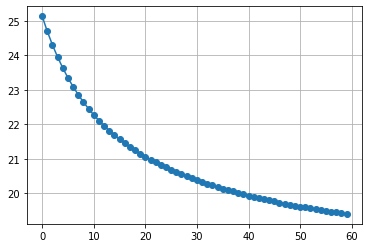

In [ ]:
plt.plot(solver.losses, marker = 'o')
plt.grid()

# Block coordinates gradient descent (randomized)

## BCGD random permutations

In [ ]:
random_solver = BCGDSolver(
    lr_strategy = 'lr_constant',
    learning_rate = 0.001,
    similarity_func = None,

    bcgd_strategy = 'random permutation',
)

In [ ]:
Y_preds_BCGD_permutation = random_solver.solve(
    X,
    Y_delabeled,
    iter_limit = 50,
    delta_loss_limit = 0.008
)

LOSS: 25.133279635517184, Delta: 25.133279635517184
LOSS: 24.688928750090955, Delta: 0.44435088542622836
LOSS: 24.292725580060836, Delta: 0.3962031700301196
LOSS: 23.93822644247524, Delta: 0.35449913758559504
LOSS: 23.619920152143496, Delta: 0.3183062903317442
LOSS: 23.333126971203544, Delta: 0.2867931809399522
LOSS: 23.07386347502288, Delta: 0.25926349618066524
LOSS: 22.83861299299209, Delta: 0.23525048203078924
LOSS: 22.624349392595477, Delta: 0.21426360039661319
LOSS: 22.42852676341245, Delta: 0.19582262918302717
LOSS: 22.248947605654802, Delta: 0.17957915775764732
LOSS: 22.083713921282524, Delta: 0.1652336843722786
LOSS: 21.931181217513227, Delta: 0.15253270376929606
LOSS: 21.789917954998117, Delta: 0.14126326251511045
LOSS: 21.65871223556772, Delta: 0.1312057194303975
LOSS: 21.536506140712113, Delta: 0.1222060948556063
LOSS: 21.422344619116146, Delta: 0.11416152159596749
LOSS: 21.315401594228238, Delta: 0.10694302488790797
LOSS: 21.21497428270711, Delta: 0.10042731152112694
LOSS: 

Accuracy: 1.0


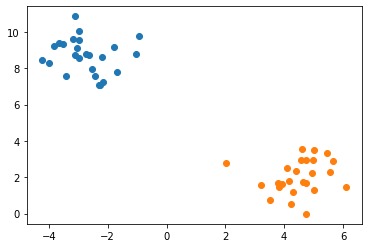

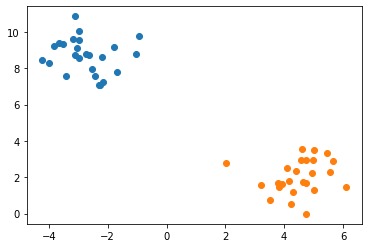

In [ ]:
plot_clusters(X, Y)
plot_clusters(X, Y_preds_BCGD_permutation)
print(f'Accuracy: {accuracy_score(Y, Y_preds_BCGD_permutation)}')

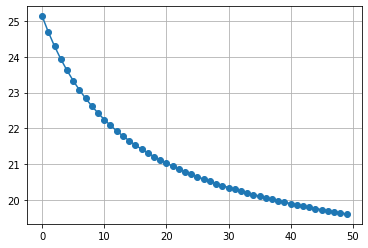

In [ ]:
plt.plot(random_solver.losses, marker = 'o')
plt.grid()

## BCGD random sampling

In [ ]:
BCGD_RS_solver = BCGDSolver(
    lr_strategy = 'lr_constant',
    learning_rate = 0.0001,
    similarity_func = None,

    bcgd_strategy = 'random sampling'
)

In [ ]:
Y_preds_BCGD_sampling = BCGD_RS_solver.solve(
    X = X, 
    Y = Y_delabeled, 
    iter_limit = 100,
    delta_loss_limit = 0.0
)

LOSS: 25.133279635517184, Delta: 25.133279635517184
LOSS: 25.133215109090905, Delta: 6.45264262786327e-05
LOSS: 25.13256666219017, Delta: 0.0006484469007332905
LOSS: 25.099869719395276, Delta: 0.03269694279489599
LOSS: 25.099805750890532, Delta: 6.396850474388316e-05
LOSS: 25.099771772874846, Delta: 3.39780156863867e-05
LOSS: 25.099675138870648, Delta: 9.663400419768209e-05
LOSS: 25.09896068912124, Delta: 0.0007144497494095958
LOSS: 25.098922576640916, Delta: 3.811248032192793e-05
LOSS: 25.098352798218713, Delta: 0.0005697784222036262
LOSS: 25.09550412269759, Delta: 0.0028486755211218906
LOSS: 25.095335737952663, Delta: 0.00016838474492786304
LOSS: 25.09530554641377, Delta: 3.0191538893831193e-05
LOSS: 25.09518866551404, Delta: 0.0001168808997284998
LOSS: 25.094481324232788, Delta: 0.0007073412812523827
LOSS: 25.094370656073647, Delta: 0.00011066815914162476
LOSS: 25.094261503096664, Delta: 0.00010915297698232962
LOSS: 25.094128779599085, Delta: 0.00013272349757897928
LOSS: 25.09380589

Accuracy: 0.96


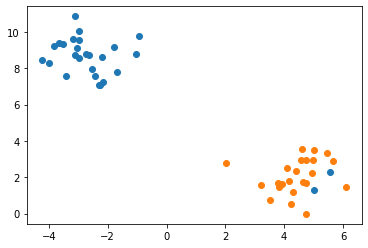

In [ ]:
plot_clusters(
    X, Y_preds_BCGD_sampling
)
print(f'Accuracy: {accuracy_score(Y, Y_preds_BCGD_sampling)}')

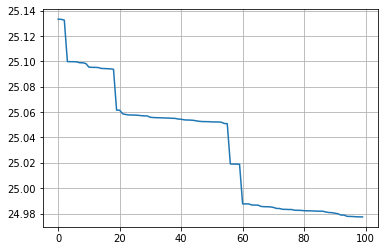

In [ ]:
plt.plot(BCGD_RS_solver.losses)
plt.grid()

## BCGD cyclic

In [ ]:
BCGD_cyclic_solver = BCGDSolver(
    lr_strategy = 'lr_constant',
    learning_rate = 0.001,
    similarity_func = None,

    bcgd_strategy = 'cyclic'
)

In [ ]:
Y_preds_BCGD_cyclic = BCGD_cyclic_solver.solve(
    X,
    Y_delabeled, 
    iter_limit = 50, 
    delta_loss_limit = 0.0001
)

LOSS: 25.133279635517184, Delta: 25.133279635517184
LOSS: 24.688868015546948, Delta: 0.4444116199702357
LOSS: 24.292568602572377, Delta: 0.39629941297457094
LOSS: 23.93796895469215, Delta: 0.354599647880228
LOSS: 23.619581106339318, Delta: 0.31838784835283107
LOSS: 23.332703530945338, Delta: 0.28687757539398007
LOSS: 23.073304105379844, Delta: 0.2593994255654941
LOSS: 22.83792084542067, Delta: 0.23538325995917475
LOSS: 22.623577681859683, Delta: 0.21434316356098648
LOSS: 22.427712969374213, Delta: 0.19586471248547
LOSS: 22.248118777142274, Delta: 0.17959419223193862
LOSS: 22.082889311591394, Delta: 0.1652294655508797
LOSS: 21.930377076276837, Delta: 0.15251223531455693
LOSS: 21.78915558898645, Delta: 0.14122148729038742
LOSS: 21.657987657902584, Delta: 0.1311679310838656
LOSS: 21.53579837222916, Delta: 0.12218928567342502
LOSS: 21.42165209247579, Delta: 0.11414627975337055
LOSS: 21.314732835299225, Delta: 0.10691925717656403
LOSS: 21.21432754053694, Delta: 0.10040529476228599
LOSS: 21.

Accuracy: 1.0


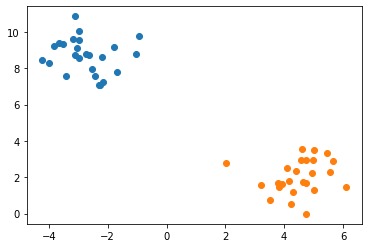

In [ ]:
print(f'Accuracy: {accuracy_score(Y_preds_BCGD_cyclic, Y)}')
plot_clusters(
    X, Y_preds_BCGD_cyclic
)

In [ ]:
accuracy_score(Y, Y_preds_BCGD_cyclic)

1.0

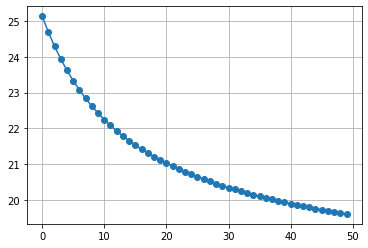

In [ ]:
plt.plot(BCGD_cyclic_solver.losses, marker = 'o')
plt.grid()

# Model comparison

We will compare models based on:
- Clustering metrics
- CPU time
- Number of iterations
- Loss curves
- Distance metrics

In [13]:
learning_rate_strategy = 'lr_constant'
simil_func = None  # No feature yet
lr = 0.001

gd_solver = GradientDescentSolver(
    similarity_func = simil_func,
    lr_strategy = learning_rate_strategy,
    learning_rate = lr
)

bcgd_permut_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'random permutation',
)

bcgd_sampling_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'random sampling',
)

bcgd_cyclic_solver = BCGDSolver(
    lr_strategy = learning_rate_strategy,
    learning_rate = lr,
    similarity_func = simil_func,
    bcgd_strategy = 'cyclic',
)

In [14]:
solvers = {
    'GD': gd_solver,
    'BCGD permutation': bcgd_permut_solver,
    'BCGD cyclic': bcgd_cyclic_solver,
    'BCGD sampling': bcgd_sampling_solver,
}

In [15]:
def compare_models(solvers_dict, X, Y_delabeled, iters_limit, delta_loss_limit):
    predictions = {k:None for k in solvers_dict.keys()}
    losses = {k:None for k in solvers_dict.keys()}
    n_iterations = {k:None for k in solvers_dict.keys()}
    cpu_times = {k:None for k in solvers_dict.keys()}

    for model_name, model in solvers_dict.items():
        start = timeit.default_timer()
        Y_preds = model.solve(
            X,
            Y_delabeled,
            iter_limit = iters_limit,
            delta_loss_limit = delta_loss_limit
        )
        end = timeit.default_timer()
        predictions[model_name] = Y_preds
        losses[model_name] = model.losses
        n_iterations[model_name] = model.n_iterations
        cpu_times[model_name] = end - start
    
    # plot_accuracies(predictions)
    # plot_losses(losses)
    # plot_iterations(n_iterations)
    # plot_cpu_times(cpu_times)

    return predictions, losses, n_iterations, cpu_times

In [16]:
import tensorflow as tf
if using_gpu:
    device_name = tf.test.gpu_device_name()

    with tf.device(device_name):
        print(f'with GPU')
        preds, losses, n_iters, cpu_times = compare_models(
            solvers,
            X,
            Y_delabeled,
            iters_limit = 100,
            delta_loss_limit = 0.0001
        )

else:
    print(f'without GPU')
    preds, losses, n_iters, cpu_times = compare_models(
            solvers,
            X,
            Y_delabeled,
            iters_limit = 100,
            delta_loss_limit = 0.0001
        )

accuracies = {name: accuracy_score(preds[name], Y) for name in solvers.keys()}

with GPU
Loss: 25.133279635517184, delta loss: 25.133279635517184
Loss: 24.692046825881985, delta loss: 0.4412328096351992
Loss: 24.298667083853772, delta loss: 0.3933797420282126
Loss: 23.94673438446902, delta loss: 0.3519326993847507
Loss: 23.63077100177023, delta loss: 0.31596338269879
Loss: 23.346088146351793, delta loss: 0.2846828554184384
Loss: 23.08866792244849, delta loss: 0.25742022390330277
Loss: 22.855063307403576, delta loss: 0.23360461504491425
Loss: 22.642313369598728, delta loss: 0.21274993780484763
Loss: 22.447871373983205, delta loss: 0.19444199561552367
Loss: 22.269543789721443, delta loss: 0.17832758426176198
Loss: 22.105438522836014, delta loss: 0.1641052668854286
Loss: 21.953920956937267, delta loss: 0.15151756589874665
Loss: 21.8135766047739, delta loss: 0.1403443521633676
Loss: 21.683179358736666, delta loss: 0.13039724603723357
Loss: 21.561664484968123, delta loss: 0.1215148737685432
Loss: 21.448105637880257, delta loss: 0.1135588470878659
Loss: 21.3416952834830

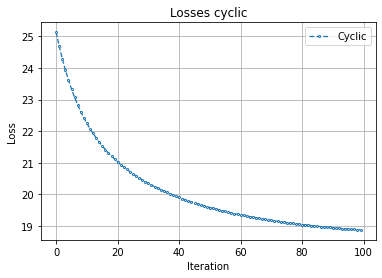

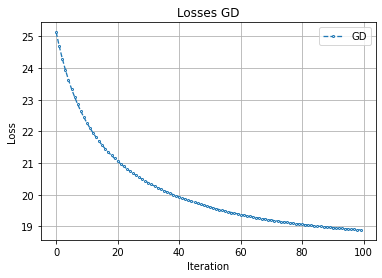

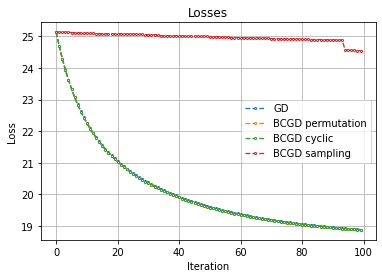

In [17]:
def plot_curves(curves_dict, title, y_label):
    _, ax = plt.subplots(figsize = (6, 4))

    for _, curve_res in curves_dict.items():
        ax.plot(
            curve_res,
            marker = 'o',
            linestyle = '--',
            linewidth = 1.3,
            markerfacecolor = 'white',
            markersize = 2
        )
    plt.legend(list(curves_dict.keys()))
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel(y_label)
    plt.grid()


plot_curves({'Cyclic':losses['BCGD cyclic']}, 'Losses cyclic', y_label = 'Loss')
plot_curves({'GD':losses['GD']}, 'Losses GD', y_label = 'Loss')
plot_curves(losses, 'Losses', y_label = 'Loss')

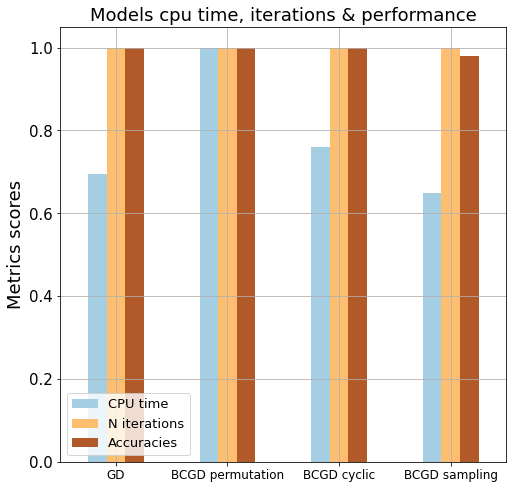

In [18]:
def plot_bar_metrics(metrics_df):
    
    ax = metrics_df.plot.bar(
        rot = 0,
        ylabel = 'Metrics results',
        cmap = 'Paired',
        figsize = (8, 8)
    )

    ax.set_title('Models cpu time, iterations & performance', fontsize = 18)
    ax.set_ylabel('Metrics scores', fontsize = 18)
    ax.tick_params(axis = 'y', labelsize = 15)
    ax.tick_params(axis = 'x', labelsize = 12)
    ax.legend(loc = 3, prop = {'size': 13})
    plt.grid()

def normalize_cols(dataframe):
    cols = dataframe.columns
    for c in cols:
        dataframe[c] = dataframe[c] / dataframe[c].max()
    

bar_metrics = pd.DataFrame.from_dict(cpu_times, orient='index', columns = ['CPU time'])
bar_metrics['N iterations'] = n_iters.values()
bar_metrics['Accuracies'] = accuracies.values()

normalize_cols(bar_metrics)
plot_bar_metrics(bar_metrics)

In [22]:
print(accuracies)
print(n_iters)
print(cpu_times)

{'GD': 1.0, 'BCGD permutation': 1.0, 'BCGD cyclic': 1.0, 'BCGD sampling': 0.98}
{'GD': 100, 'BCGD permutation': 100, 'BCGD cyclic': 100, 'BCGD sampling': 100}
{'GD': 7.227359197999988, 'BCGD permutation': 10.386953243000022, 'BCGD cyclic': 7.905858671000004, 'BCGD sampling': 6.742964641000015}


# Real dataset

In [23]:
wine=datasets.load_wine()

#Conver to pandas dataframe
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

data = data.loc[
    (data['target'] == 1) | (data['target'] == 0),
    ['od280/od315_of_diluted_wines', 'alcohol', 'target']
]

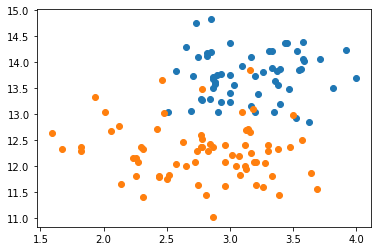

In [24]:
X_real = data.loc[
    :,
    ['od280/od315_of_diluted_wines', 'alcohol']
].values
Y_real = data['target'].values

plot_clusters(
    X_real,
    Y_real
)

In [25]:
Y_real_delabeled = delabel_data(
    Y_real,
    labeled_percent = 0.06, # DataProperties.labeled_percentage,
    delabel_value = DataProperties.unlabeled
)

Found 59 instances of object 0.0
We have to delabel 55 instances
Found 71 instances of object 1.0
We have to delabel 66 instances


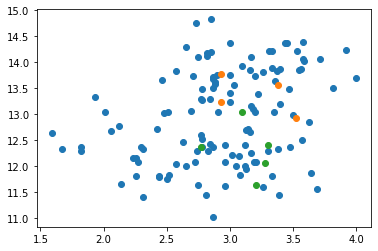

In [26]:
plot_clusters(
    X_real,
    Y_real_delabeled
)

In [28]:
solver = GradientDescentSolver(
    lr_strategy = 'lr_constant',
    learning_rate = 0.001,
    similarity_func = None
)

Y_real_preds = solver.solve(
    X_real,
    Y_real_delabeled,
    iter_limit=50,
    delta_loss_limit = 0.003
)

Loss: 418.6689762690717, delta loss: 418.6689762690717
Loss: 406.88040148284796, delta loss: 11.788574786223762
Loss: 402.26630403070095, delta loss: 4.614097452147007
Loss: 399.8066165660734, delta loss: 2.4596874646275637
Loss: 398.2807454379201, delta loss: 1.5258711281533124
Loss: 397.25985793600603, delta loss: 1.0208875019140464
Loss: 396.54180048024244, delta loss: 0.718057455763585
Loss: 396.01526958942674, delta loss: 0.5265308908157067
Loss: 395.61424139565827, delta loss: 0.4010281937684681
Loss: 395.2978688551002, delta loss: 0.3163725405580635
Loss: 395.04013091027366, delta loss: 0.25773794482654466
Loss: 394.8240615821496, delta loss: 0.21606932812403556
Loss: 394.6383777587026, delta loss: 0.18568382344705014
Loss: 394.47544197208583, delta loss: 0.16293578661674246
Loss: 394.3299987943163, delta loss: 0.1454431777695504
Loss: 394.1983737196404, delta loss: 0.13162507467586693
Loss: 394.077955770547, delta loss: 0.12041794909339387
Loss: 393.9668580429273, delta loss: 0

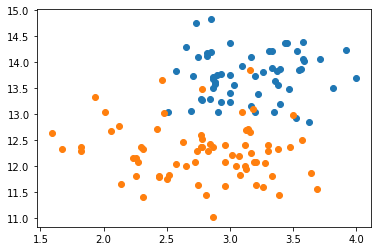

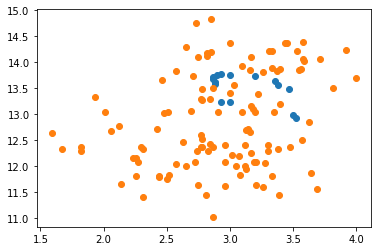

In [29]:
plot_clusters(
    X_real,
    Y_real
)
plot_clusters(
    X_real,
    Y_real_preds
)